# Text Analysis with pandas

This workbook will use the Natural Language Toolkit Library (nltk) to analyze and process a pandas dataframe, using the Women's E-Commerce Clothing Reviews from kaggle.com (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews).
Upon inital review, stopwords seemed to be skewing the data by eliminating words that would lead to a more negitive sentiment.
Overall, we can see that the sentiment is not representative of the Rating or Recommended columns.

In [87]:
import pandas as pd

import nltk
from nltk.tokenize import word_tokenize   # used to tokenize our text into a list
from nltk.probability import FreqDist   # used to find frequency distribution of words
from nltk.corpus import stopwords   # used to remove stopwords in our text
from nltk.sentiment.vader import SentimentIntensityAnalyzer # used for sentiment analysis on text

import seaborn as sns

from string import punctuation   # used to remove punctuation in our text

In [100]:
# Open the csv and load into a pandas dataframe
df = pd.read_csv('women_clothing_review.csv')
print(df.shape)

(23486, 11)


In [101]:
# Drop columns that are not applicable
# Unnamed = Assigned index, we will use pandas
# Title = Title of the comment
# ID = 
# Age = removed for 
df.drop(['Unnamed: 0','Title'], axis=1)

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [102]:
# Drop null values from the Review Text column
df = df.dropna(subset=['Review Text'])

In [103]:
print(df.shape)

(22641, 11)


In [104]:
# I need to add some additional punctuation marks, that are not part of the baseline
punctuation = punctuation + "’‘"
# Apply english stopwords to a variable
eng_stopwords = stopwords.words('english')
# initalize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

In [105]:
# Create a function that will analyze the ['Review Text'] column text
def reviewSentiment(data):
    if isinstance(data, str) is True:
        data = str(data)
        data = data.lower()   # convert to all lowercase text
        tknz = word_tokenize(data)   # tokenize all elements

        for token in tknz:
            if token in punctuation:
                tknz.remove(token)

        clean_data = []
        for word in tknz:
            if word not in eng_stopwords:
                clean_data.append(word)

        assemb_txt = ' '.join(clean_data)
        sid_review = sid.polarity_scores(assemb_txt)
        r_comp = sid_review['compound']

        return r_comp

In [106]:
# Apply the function reviewSentiment to the ['Review Text'] column in the dataframe
df['text_sentiment'] = df['Review Text'].apply(reviewSentiment)

In [108]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,text_sentiment
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.8991
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.9710
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.9062
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.9464
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.9117


In [133]:
# Function to assign a polarity category for the sentiment rating
# Numbers are best guess, need to look closer at segments of the data to refine
def sentCategory(number):
    if number >= 0.5:
        return 'positive'
    if number <= -.01:
        return 'negative'
    else:
        return 'neutral'

In [134]:
df['sent_category'] = df['text_sentiment'].apply(sentCategory)

In [135]:
# As we can see with the top 10 rows in the dataframe, the sentiment is not representative of the rating or recommentdation
df.head(20)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,text_sentiment,sent_category
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.8991,positive
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.9710,positive
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.9062,positive
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.9464,positive
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.9117,positive
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.9153,positive
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.6361,positive
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,0.5709,positive
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,0.7579,positive
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,0.9643,positive


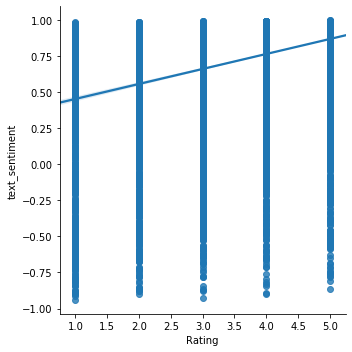

In [129]:
sns.lmplot(x='Rating', y='text_sentiment', data=df)

In [136]:
df['sent_category'].value_counts()

positive    20025
neutral      1839
negative      777
Name: sent_category, dtype: int64

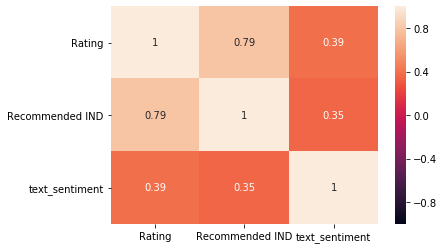

In [132]:
# We can take a sample of the four columns that would be representative of the customer
# and see if text_sentiment is aligning with them
sample_df = df[['Rating', 'Recommended IND', 'text_sentiment']].copy()
corr = sample_df.corr()
sns.heatmap(corr, vmin=-1, annot=True)